In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from lsst.sims.movingObjects import Orbits

The Scattering disk model from Cory Shankman (see Shankman et al. 2016, AJ, 151 p31)

In [2]:
modelfile = '/epyc/users/lynnej/sso/shankman/LSST_Scattering_model.txt'
columns = ['a', 'e', 'inc', 'Omega', 'argPeri', 'meanAnomaly', 'H', 'g-r']
model = pd.read_csv(modelfile, delim_whitespace=True, comment='#', names=columns, index_col=False)
model = model.assign(epoch=59853)

In [6]:
print(len(model))
model[0:5]

4900000


,a,e,inc,Omega,argPeri,meanAnomaly,H,g-r,epoch
0,844.62,0.9451,15.72,107.72,317.43,247.82,12.67,0.37,59853
1,412.51,0.9076,23.23,328.23,287.94,105.86,13.40,0.81,59853
2,238.67,0.8537,7.06,124.09,113.22,312.01,13.33,0.67,59853
3,116.78,0.6956,18.54,328.95,91.56,40.43,13.66,0.46,59853
4,207.83,0.8025,29.29,277.65,279.22,88.06,13.93,0.84,59853


In [4]:
subsetLen = 5000
# Pick a random subset of the model: 
sub = model.sample(subsetLen)

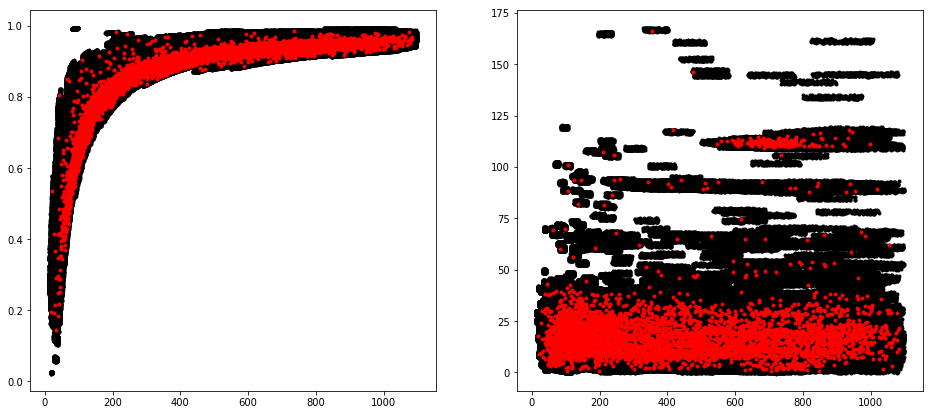

In [5]:
plt.figure(figsize=(16, 7))
plt.subplot(1,2,1)
plt.plot(model.a, model.e, 'k.')
plt.plot(sub.a, sub.e, 'r.')
plt.subplot(1,2,2)
plt.plot(model.a, model.inc, 'k.')
plt.plot(sub.a, sub.inc, 'r.')

In [7]:
subsetLen = 5000
subpieces = 500
root = 'sdo_5k'

subset = Orbits()
subset.setOrbits(model.sample(subsetLen))
print(len(model), len(subset), len(subset.orbits.objId.unique()))
subset.orbits.to_csv('%s.txt' % root, index=False, sep=' ')

x = np.arange(0, subsetLen+1, subpieces)
try:
    os.mkdir('split')
except FileExistsError:
    pass

for i, (xi, xo) in enumerate(zip(x[:-1], x[1:])):
    subset.orbits[xi:xo].to_csv('split/%s_%d.txt' % (root, i), index=False, sep=' ')

4900000 5000 5000


In [8]:
# differences in colors??
# size distribution?

In [12]:
isinstance(subset.orbits.iloc[0], pd.Series)

True